In [99]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot
from matplotlib import pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon
import shutil

In [100]:
shutil.unpack_archive("./data/Traffic_Violations.csv.zip", "./data/", "zip")

In [101]:
data = pd.read_csv("./data/Traffic_Violations.csv", low_memory=False)

In [102]:
data = data.dropna()

In [6]:
charge = data.value_counts(['Charge']).reset_index(name='count')
top_10_charges = charge.head(10)

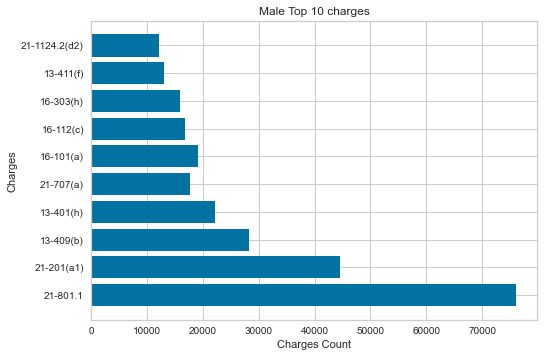

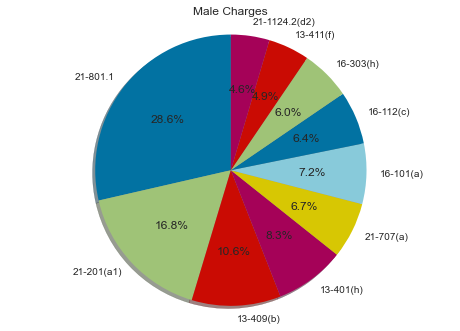

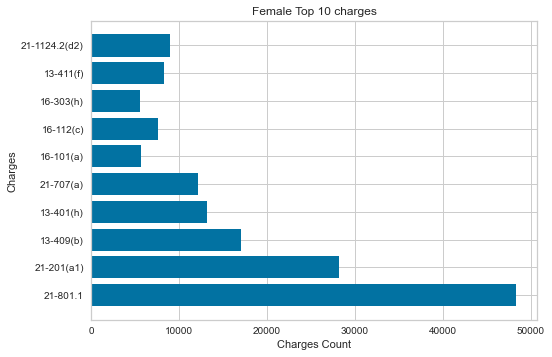

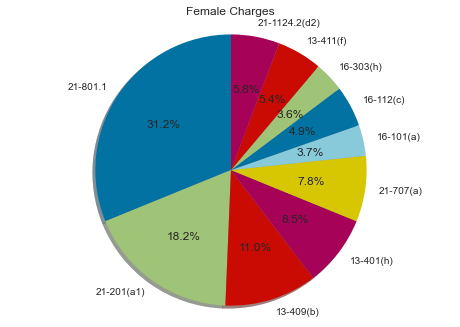

In [86]:
gender_charge = data[['Charge', 'Gender', 'Description']]
gender = data.value_counts(['Gender']).reset_index(name='count')
total_male = gender[gender['Gender'] == 'M'].count

male_charge = {}
female_charge = {}

for charge in top_10_charges.Charge:
    c = gender_charge[gender_charge['Charge'] == charge]
    male = c[c['Gender']=='M']
    female = c[c['Gender']=='F']
    male_charge[charge] = male.shape[0]
    female_charge[charge] = female.shape[0]


plt.barh(list(male_charge.keys()), male_charge.values())
plt.xlabel("Charges Count")
plt.ylabel("Charges")
plt.title("Male Top 10 charges")
plt.show()

fig1, ax1 = plt.subplots()
ax1.pie(male_charge.values(), labels=male_charge.keys(), autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Male Charges")
# show plot
plt.show()


plt.barh(list(female_charge.keys()), female_charge.values())
plt.xlabel("Charges Count")
plt.ylabel("Charges")
plt.title("Female Top 10 charges")
plt.show()

fig1, ax1 = plt.subplots()
ax1.pie(female_charge.values(), labels=female_charge.keys(), autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Female Charges")
# show plot
plt.show()


In [8]:
table = pd.crosstab(gender_charge['Gender'], gender_charge['Charge'])
# chi-squared test with similar proportions
from scipy.stats import chi2_contingency
from scipy.stats import chi2

stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

NameError: name 'gender_charge' is not defined

In [ ]:
race_charge = data[['Charge', 'Race', 'Description']]
race = data.value_counts(['Race']).reset_index(name='count')
races = race_charge['Race'].unique()
race_charges_list = {}


for race in races:
    
    r_c = race_charge[race_charge['Race'] == race]
    race_vs_charges = {}
    
    for charge in top_10_charges.Charge:
        charg = r_c[r_c['Charge'] == charge]
        race_vs_charges[charge] = charg.shape[0]
    race_charges_list[race] = race_vs_charges

fig1, ax1 = plt.subplots(3,2,figsize= (10,10))
i = 0
races_2D = np.array(races)
B = np.reshape(races_2D, (-1, 2))
for i in range(3):
    for j in range(2):  
        key = B[i][j]
        ax1[i,j].pie(race_charges_list[key].values(), labels=race_charges_list[key].keys(), autopct='%1.1f%%', shadow=True, startangle=90)
        ax1[i,j].axis('equal')
        ax1[i,j].title.set_text(key)
#plt.savefig('races_vs_charges')
plt.show()

fig1, ax1 = plt.subplots(3,2,figsize= (15,15), sharex=False, sharey=False)
i = 0
races_2D = np.array(races)
B = np.reshape(races_2D, (-1, 2))
for i in range(3):
    for j in range(2):  
        key = B[i][j]
        ax1[i,j].barh(list(race_charges_list[key].keys()), race_charges_list[key].values())
        ax1[i,j].title.set_text(key)
#plt.savefig('races_vs_charges')
plt.show()

In [98]:
table = pd.crosstab(race_charge['Race'], race_charge['Charge'])

stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

dof=4440
probability=0.950, critical=4596.129, stat=81852.414
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


In [13]:
np_belts_before = np.array([0,0])
np_belts_after = np.array([0,0])

from datetime import datetime
seatbelt_law_date = datetime.strptime("08/01/2013", "%m/%d/%Y")

for index, item in data.iterrows():
    if index % 100 == 0:
        print(index, end="\r")
    temp_date = datetime.strptime(item['Date Of Stop'], "%m/%d/%Y")
    if temp_date.date() <= seatbelt_law_date.date(): # Before the law
        if item.Belts.lower() == "no":
            np_belts_before[1] += 1
        else:
            np_belts_before[0] += 1
    else:
        if item.Belts.lower() == "no":
            np_belts_after[1] += 1
        else:
            np_belts_after[0] += 1
print(f"Belts before: {np_belts_before}")
print(f"Belts after: {np_belts_after}")

np_belts_after_adjusted = np_belts_after
np_belts_after_adjusted[0] = np_belts_after_adjusted[0] / 4
np_belts_after_adjusted[1] = np_belts_after_adjusted[1] / 4

print(f"Adjusted belts after: {np_belts_after_adjusted}")


Belts before: [  7135 215803]
Belts after: [ 25399 623732]
Adjusted belts after: [  6349 155933]


([], [])


<BarContainer object of 2 artists>

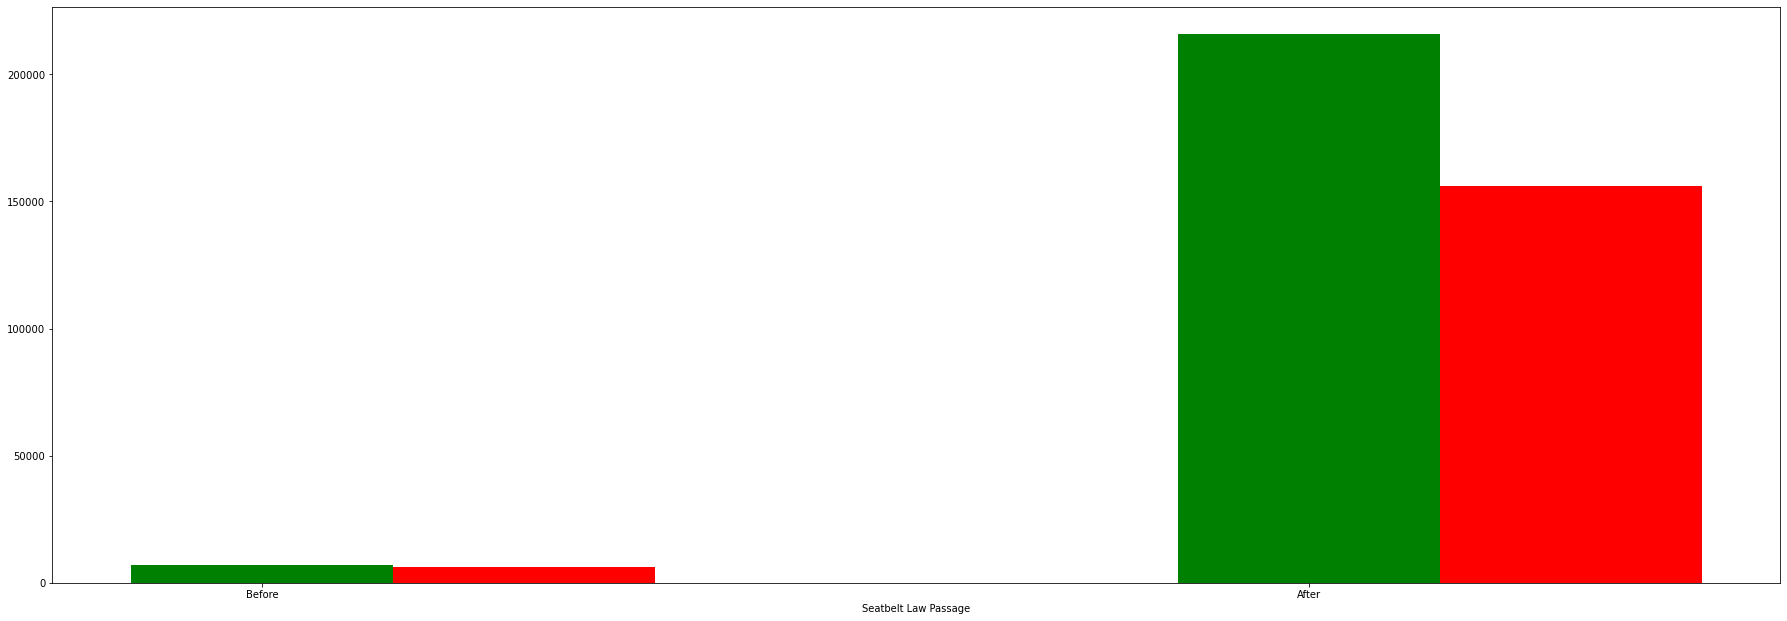

In [14]:
X = np.arange(2)
fig = plt.figure()

ax = fig.add_axes([0,0,4,2])
law_classification = ['Before', 'After']

ax.set_xlabel("Seatbelt Law Passage")
ax.set_xticks(range(2))
ax.set_xticklabels(law_classification)

print(ax.get_legend_handles_labels())

ax.bar(X + 0.00, np_belts_before, color = 'g', width = 0.25)
ax.bar(X + 0.25, np_belts_after_adjusted, color = 'r', width = 0.25)

In [59]:
from sklearn.cluster import KMeans
import numpy as np

d = data[['Geolocation', 'Charge']]
geolocation = np.zeros((len(d), 2))
j = 0
for i in d.Geolocation:
    t = i.replace("(","")
    t = t.replace(")","")
    geolocation[j][0] = float(t.split(',')[0])
    geolocation[j][1] = float(t.split(',')[1])
    j=j+1
        

geolocation = geolocation[geolocation[:,1] < -76.50]
geolocation = geolocation[geolocation[:,0] > 38.75]
size = geolocation.shape[0]

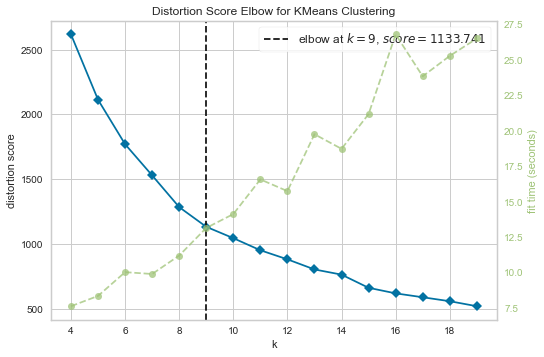

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [50]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,20))

visualizer.fit(geolocation[0:size,])        # Fit the data to the visualizer
visualizer.show()

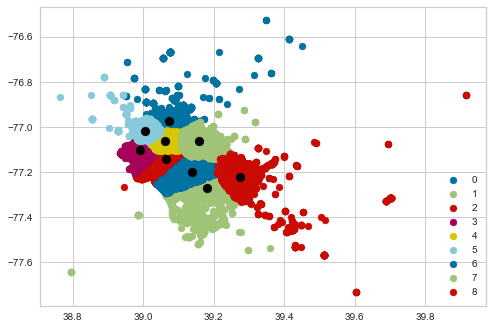

In [103]:
kmeans = KMeans(n_clusters=9, random_state=0)
label = kmeans.fit_predict(geolocation[0:size,])

new_geolocation = geolocation[0:size,]
location_with_label = np.zeros((size, 3))


for i in range(size):
    location_with_label[i][0] = new_geolocation[i][0]
    location_with_label[i][1] = new_geolocation[i][1]
    location_with_label[i][2] = label[i]

u_labels = np.unique(label)
for i in u_labels:
    filtered_label = location_with_label[location_with_label[:,2] == i]
    plt.scatter(filtered_label[:,0] , filtered_label[:,1] , label = i)
plt.scatter(kmeans.cluster_centers_[:,0] , kmeans.cluster_centers_[:,1] , s = 80, color = 'black')
plt.legend()
plt.show()

39.9147366666667

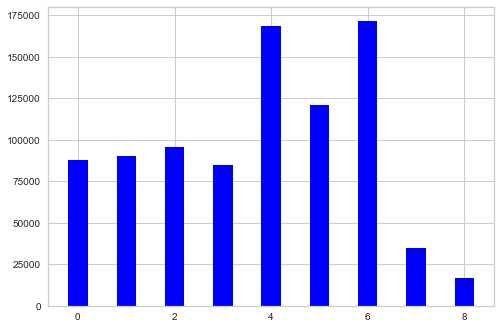

In [61]:
label_count = {}
for i in u_labels:
    filtered_label = location_with_label[location_with_label[:,2] == i]
    # print(np.max(filtered_label[:,0]), np.min(filtered_label[:,0]))
    # print(np.max(filtered_label[:,1]), np.min(filtered_label[:,1]))

    label_count[i] = filtered_label.shape[0]
plt.bar(u_labels, list(label_count.values()), color ='blue',
        width = 0.4)
np.max(location_with_label[:,0])

<AxesSubplot:>

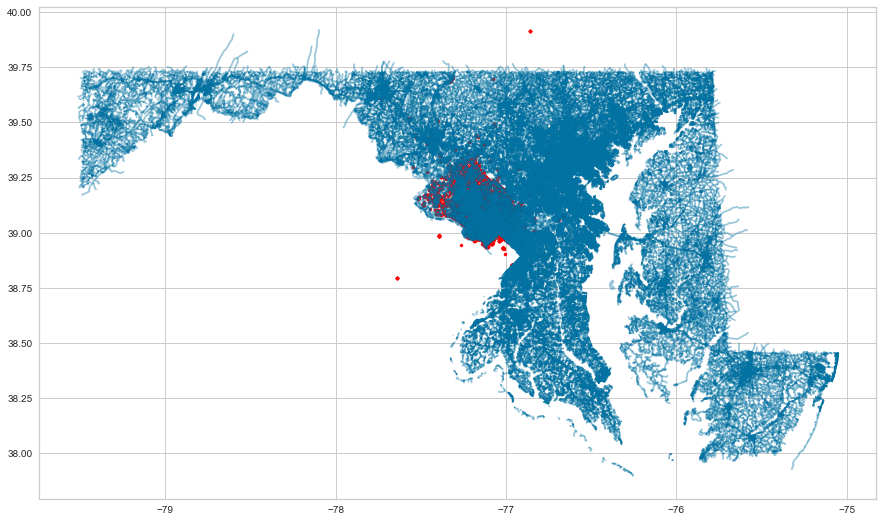

In [62]:
import geopandas as gpd
from shapely.geometry import Point, Polygon

import shutil
shutil.unpack_archive("./roads/main.zip", "./roads/", "zip")

usa = gpd.read_file("C:\\Users\\A02351046\\cs5830_final\\roads\\gis_osm_roads_free_1.shp")

geometry = [Point(xy) for xy in zip(location_with_label[:,1], location_with_label[:,0])]

geo_df = gpd.GeoDataFrame(crs = usa.crs, geometry = geometry)
fig, ax = plt.subplots(figsize=(15,15))
usa.plot(ax=ax, alpha = 0.4)
geo_df.plot(ax=ax, color='red', markersize=10)

In [1]:
# data comes from data.gov and United States Census data for Maryland Counties
pop = pd.read_csv("Maryland_Counties_Socioeconomic_Characteristics.csv")
traffic = pd.read_csv("Traffic_Violations_2.csv")

NameError: name 'pd' is not defined

In [67]:
race = pop[["White Alone", "Black Alone", "Asian Alone", "American Indian/Alaska Native Alone", "Native Hawaiian/Pacific Islander Alone", "Some Other Race Alone", "Two or More Races", "Hispanic or Latino (of any race)"]]
race.head()

In [ ]:
gender = pop[["Male", "Female"]]
gender.head()

In [ ]:
gender_sum = gender.sum().reset_index(name="population")
sns.barplot(x="index", y="population", data=gender_sum)

In [ ]:
gender_traffic = traffic.value_counts(['Gender']).reset_index(name='count')
sns.barplot(x="Gender", y="count", data=gender_traffic)

In [ ]:
race.rename(columns={"White Alone":"White"}, inplace=True)
race.rename(columns={"Black Alone":"Black"}, inplace=True)
race.rename(columns={"Asian Alone":"Asian"}, inplace=True)
race.rename(columns={"American Indian/Alaska Native Alone":"Native"}, inplace=True)
race.rename(columns={"Native Hawaiian/Pacific Islander Alone":"Pacific"}, inplace=True)
race.rename(columns={"Some Other Race Alone":"Other"}, inplace=True)
race.rename(columns={"Two or More Races":"Multiple"}, inplace=True)
race.rename(columns={"Hispanic or Latino (of any race)":"Hispanic"}, inplace=True)

#population of Maryand race
demograph = race.sum().reset_index(name="population")
sns.barplot(x="index", y="population", data=demograph)

In [ ]:
race_traffic = traffic.value_counts(['Race']).reset_index(name='count')
sns.barplot(x="Race", y="count", data=race_traffic)

In [104]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

In [105]:
counties_df = pd.read_csv(".\counties.csv")
counties_df = counties_df[counties_df['statefips'] == 24]
counties_df['boundingbox'] = counties_df['boundingbox'].apply(lambda x: x.replace("POLYGON((",""))
counties_df['boundingbox'] = counties_df['boundingbox'].apply(lambda x: x.replace("))",""))

In [106]:
class County():
    def __init__(self):
        polygon = None
        county_name = None
counties = []

In [107]:
for index, row in counties_df.iterrows():
    county = County()
    county.county_name = row['name']
    shapes = []
    lng_lats = row['boundingbox'].split(',')
    for obj in lng_lats:
        longitude = obj.split(" ")[0]
        latitude = obj.split(" ")[1]
        shapes.append([float(longitude), float(latitude)])
    county.polygon = Polygon(shapes)
    counties.append(county)

In [108]:
def find_county_name(longitude, latitude):
    point = Point(longitude,latitude)
    county_name = ""
    for county in counties:
        if point.within(county.polygon):
            county_name = county.county_name
    return county_name

In [131]:
location_with_label_df = pd.DataFrame(location_with_label, columns = ['latitude','longitude', 'label'])
location_with_label_df['county'] = ""
for index, row in location_with_label_df.iterrows():
    location_with_label_df.loc[index, 'county'] = (find_county_name(row['longitude'], row['latitude']))

In [112]:
location_with_label_df[location_with_label_df['county'] == '']

,latitude,longitude,label,county
230571,38.794718,-77.642162,1.0,
368756,39.914737,-76.859307,8.0,
368788,39.914737,-76.859307,8.0,
368823,39.914737,-76.859307,8.0,
368856,39.914737,-76.859307,8.0,
630959,38.794197,-77.640880,1.0,
630960,38.794197,-77.640880,1.0,
630961,38.794197,-77.640880,1.0,
630962,38.794197,-77.640880,1.0,
632879,38.794718,-77.642162,1.0,


<AxesSubplot:xlabel='county'>

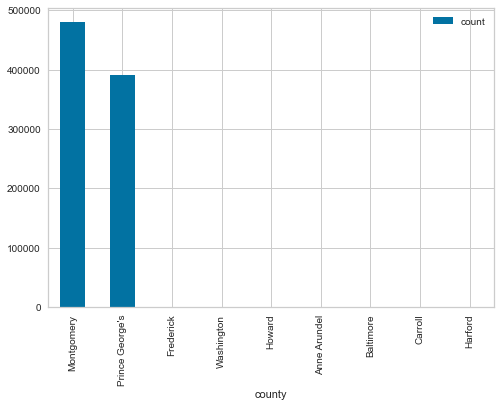

In [130]:
county_counts = location_with_label_df.value_counts(['county']).reset_index(name='count')
county_counts = county_counts[county_counts['county'] != '']
county_counts.plot.bar(x='county', y='count', rot=90)

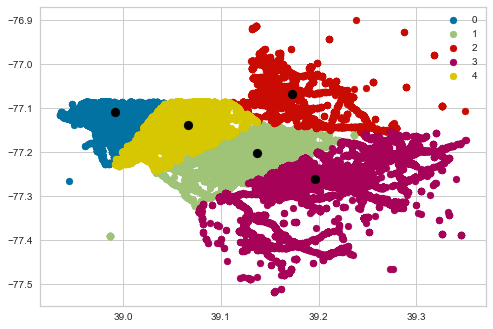

In [147]:
import pickle
with open("./county_vs_location.pickle", 'rb') as file:
    f = pickle.load(file)

f = f[f[:,3] == "Montgomery"]

kmeans = KMeans(n_clusters=5, random_state=0)
label = kmeans.fit_predict(f[0:f.shape[0],0:2])

montgomery_county_with_label = np.zeros((f.shape[0], 3))


for i in range(f.shape[0]):
    montgomery_county_with_label[i][0] = f[i][0]
    montgomery_county_with_label[i][1] = f[i][1]
    montgomery_county_with_label[i][2] = label[i]

u_labels = np.unique(label)
for i in u_labels:
    filtered_label = montgomery_county_with_label[montgomery_county_with_label[:,2] == i]
    plt.scatter(filtered_label[:,0] , filtered_label[:,1] , label = i)
plt.scatter(kmeans.cluster_centers_[:,0] , kmeans.cluster_centers_[:,1] , s = 80, color = 'black')
plt.legend()
plt.show()

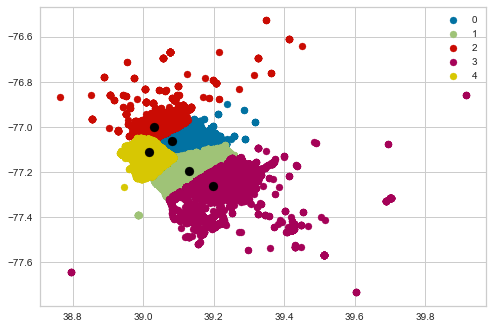

In [180]:
import pickle
with open("./county_vs_location.pickle", 'rb') as file:
    f = pickle.load(file)

# print("Prince George\'s")
#f = f[f[:,3] == "Prince Georges's"]
# print(f[:,3])
# np.where(f[:,3] == 'Prince Georges\'s')
df = pd.DataFrame(f)
df[3] =df[3].map(lambda x: x.replace('\'',''))
f = df.values
kmeans = KMeans(n_clusters=5, random_state=0)
label = kmeans.fit_predict(f[0:f.shape[0],0:2])

montgomery_county_with_label = np.zeros((f.shape[0], 3))


for i in range(f.shape[0]):
    montgomery_county_with_label[i][0] = f[i][0]
    montgomery_county_with_label[i][1] = f[i][1]
    montgomery_county_with_label[i][2] = label[i]

u_labels = np.unique(label)
for i in u_labels:
    filtered_label = montgomery_county_with_label[montgomery_county_with_label[:,2] == i]
    plt.scatter(filtered_label[:,0] , filtered_label[:,1] , label = i)
plt.scatter(kmeans.cluster_centers_[:,0] , kmeans.cluster_centers_[:,1] , s = 80, color = 'black')
plt.legend()
plt.show()